In [2]:
# Import Libraries
import pandas as pd
import os 
import matplotlib.pyplot as plt

#### Task 1 - Merge the 12 Months of Data Together

In [3]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

# Review code below for study
files = [file for file in os.listdir('./Sales_Data')]

all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_data = pd.concat([all_data, df])

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Clean Data!!

In [7]:
# Dealing w/ Nan Values
all_data = nan_df = all_data.dropna(how='all')

In [8]:
# Error coming up in later code due to 'Or' being in the date column - Filter Data to see what's going on
temp_data = all_data[all_data['Order Date'].str[0:2] == 'Or']

# Code above has identified where the column names are duplicated to the rows
# Use != to get the code that doesn't have duplicate colun names and set it to the df

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert Columns to Correct data types

In [9]:
# pd.to_numeric is a handy way to make data types numeric without having to specify a float or in

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

Question 1: What was the best month for Sales? How much was earned that month?
- Clean data
- Create Month Column
- Create Sales Column
- Create Visual for monthly sales data

In [10]:
all_data["Month"] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Add Sales Column

In [11]:
all_data['Sales Value'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Value
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


Group the data by month to see which is the top performer

In [12]:
results = all_data.groupby('Month').sum()

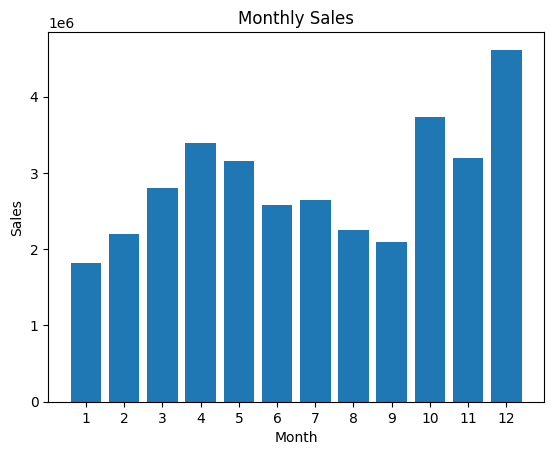

In [13]:
months = range(1,13)

plt.bar(months, results['Sales Value'])
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(months)
plt.show()

Q2 - What City makes the most revenue?
- First add City Column

In [16]:
city_sales = all_data.groupby('City').sum()['Sales Value'].sort_values(ascending=False)
print(city_sales)

City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: Sales Value, dtype: float64


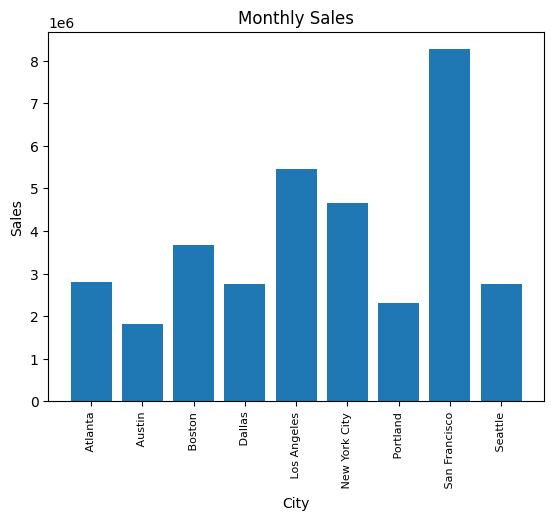

In [17]:
cities = [city for city, df in all_data.groupby('City')]
results_1 = all_data.groupby('City').sum()

plt.bar(cities, results_1['Sales Value'])
plt.title('Monthly Sales')
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.show()

#### Question 3 - What is the best time to push advertisments?

In [18]:
#all_data['Order Time'] = all_data['Order Date'].str[-5:]

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


/var/folders/0d/mbrvmyx10n92tdtbjzgv0tjm0000gn/T/ipykernel_588/905675768.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [20]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

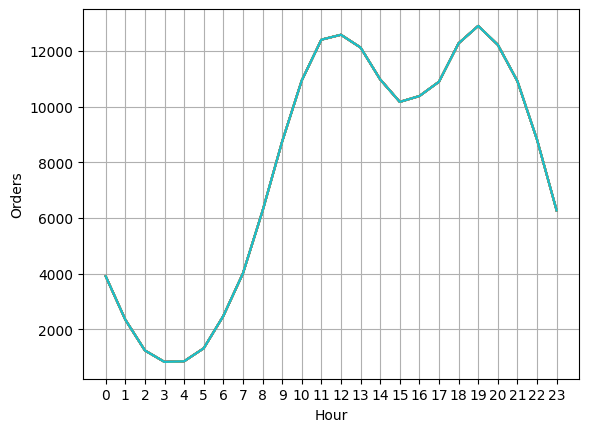

In [21]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xlabel('Hour')
plt.ylabel('Orders')
plt.xticks(hours)
plt.grid()
plt.show()

# Recommended time for advertising would be 10-11am 7 5-6pm

## Review**

#### Q4 What products are most oftern sold together?

In [22]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df

/var/folders/0d/mbrvmyx10n92tdtbjzgv0tjm0000gn/T/ipykernel_588/729883513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
13570,222863,"27in FHD Monitor,Bose SoundSport Headphones"
13576,222868,"iPhone,Apple Airpods Headphones"
13591,222882,"Apple Airpods Headphones,AA Batteries (4-pack)"
13594,222884,"Google Phone,USB-C Charging Cable"


In [23]:
from itertools import combinations 
from collections import Counter 

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### Q5 - What product sold the most and why?
- First group by product and sum order quantity
- Sort values in descending order by order quantity
- Review results

In [24]:
prod_group = all_data.groupby('Product').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'mean'
}).reset_index().sort_values(by='Quantity Ordered', ascending=False)

print(prod_group)


                       Product  Quantity Ordered  Price Each
5       AAA Batteries (4-pack)           31017.0        2.99
4        AA Batteries (4-pack)           27635.0        3.84
15        USB-C Charging Cable           23975.0       11.95
12    Lightning Charging Cable           23217.0       14.95
17            Wired Headphones           20557.0       11.99
6     Apple Airpods Headphones           15661.0      150.00
7   Bose SoundSport Headphones           13457.0       99.99
2             27in FHD Monitor            7550.0      149.99
18                      iPhone            6849.0      700.00
1       27in 4K Gaming Monitor            6244.0      389.99
3       34in Ultrawide Monitor            6199.0      379.99
9                 Google Phone            5532.0      600.00
8                Flatscreen TV            4819.0      300.00
13          Macbook Pro Laptop            4728.0     1700.00
14             ThinkPad Laptop            4130.0      999.99
0                 20in M

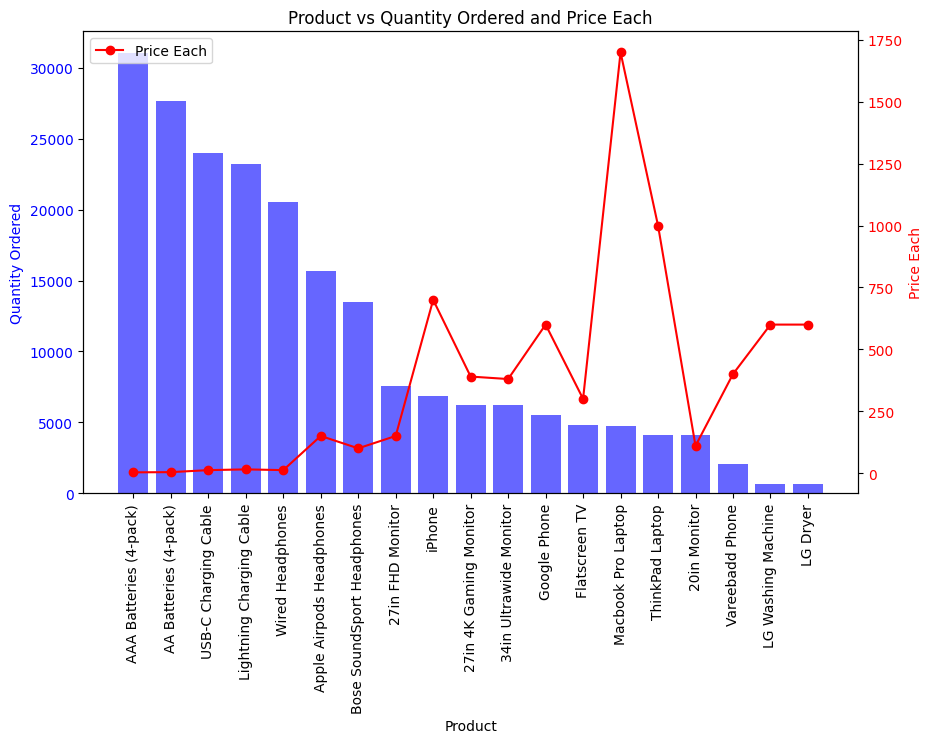

In [25]:
import matplotlib.pyplot as plt

# Create a figure and set the size
plt.figure(figsize=(10, 6))

# Plot 'Quantity Ordered' on the primary y-axis using plt.bar
plt.bar(prod_group['Product'], prod_group['Quantity Ordered'], color='b', alpha=0.6, label='Quantity Ordered')
plt.xlabel('Product')
plt.xticks(rotation='vertical')
plt.ylabel('Quantity Ordered', color='b')
plt.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis
plt.twinx()
plt.plot(prod_group['Product'], prod_group['Price Each'], color='r', marker='o', label='Price Each')
plt.ylabel('Price Each', color='r')
plt.tick_params(axis='y', labelcolor='r')

# Title and legend
plt.title('Product vs Quantity Ordered and Price Each')
plt.legend(loc='upper left')

# Show the plot
plt.show()


In [35]:
prod_group = all_data.groupby('Product').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'mean'
}).reset_index().sort_values(by='Price Each', ascending=False)

print(prod_group)

                       Product  Quantity Ordered  Price Each
13          Macbook Pro Laptop            4728.0     1700.00
14             ThinkPad Laptop            4130.0      999.99
18                      iPhone            6849.0      700.00
10                    LG Dryer             646.0      600.00
11          LG Washing Machine             666.0      600.00
9                 Google Phone            5532.0      600.00
16             Vareebadd Phone            2068.0      400.00
1       27in 4K Gaming Monitor            6244.0      389.99
3       34in Ultrawide Monitor            6199.0      379.99
8                Flatscreen TV            4819.0      300.00
6     Apple Airpods Headphones           15661.0      150.00
2             27in FHD Monitor            7550.0      149.99
0                 20in Monitor            4129.0      109.99
7   Bose SoundSport Headphones           13457.0       99.99
12    Lightning Charging Cable           23217.0       14.95
17            Wired Head